<a href="https://colab.research.google.com/github/Lenakirara/QuarentenaDados_Alura/blob/master/quarentenaDados_Aula03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AULA 01

- Analisando dados do MovieLens

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [346]:
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')
# filmes - dataframe // .head() busca as 5 primeiras posições
filmes.columns = ['filmeId', 'título', 'genero']
filmes.head()

,filmeId,título,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
#traz a documentação de filmes.head
#lendo a documentação de um metodo/atributo
?filmes.head

In [0]:
#lendo a documentação do tipo (docstring)
?filmes

In [349]:
avaliacoes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv')
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [350]:
#renomear as colunas
avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [351]:
avaliacoes.query('filmeId == 1')

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [352]:
#verifica as informações de avaliacoes
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [353]:
avaliacoes['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [354]:
avaliacoes.query('filmeId == 1').mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

In [355]:
#media das notas
nota_media_por_filme = avaliacoes.groupby('filmeId')['nota'].mean()
nota_media_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [356]:
#juntar informaçoes - JOIN
filmes_com_media = filmes.join(nota_media_por_filme, on = 'filmeId')
filmes_com_media.head()

,filmeId,título,genero,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [357]:
filmes_com_media.sort_values('nota')

,filmeId,título,genero,nota
5554,26696,Lionheart (1990),Action,0.5
2689,3604,Gypsy (1962),Musical,0.5
4881,7312,"Follow Me, Boys! (1966)",Comedy|Drama,0.5
9117,145724,Idaho Transfer (1973),Sci-Fi,0.5
7297,76030,Case 39 (2009),Horror|Thriller,0.5
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


In [358]:
filmes_com_media.sort_values('nota', ascending=False).head(15)

,filmeId,título,genero,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


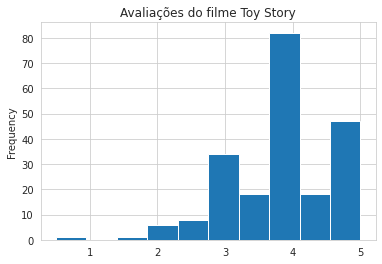

In [359]:

avaliacoes.query('filmeId == 1')['nota'].plot(kind='hist')
plt.title('Avaliações do filme Toy Story')
plt.show()

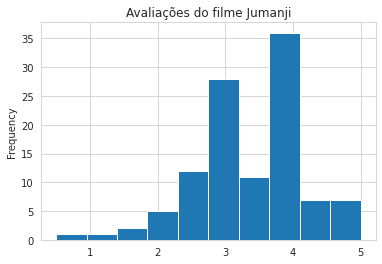

In [360]:
avaliacoes.query('filmeId == 2')['nota'].plot(kind='hist',
                                              title='Avaliações do filme Jumanji')
plt.show()

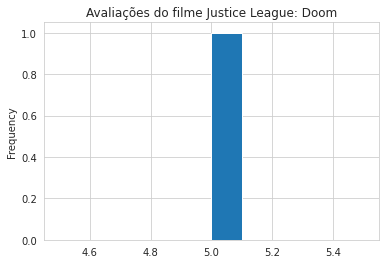

In [361]:
avaliacoes.query('filmeId == 102084')['nota'].plot(kind='hist',
                                                   title='Avaliações do filme Justice League: Doom')
plt.show()

### DESAFIOS - AULA 01



- DESAFIO 01 : O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?
Determine quantos filmes não tem avaliações e quais são esses filmes.

In [362]:
filmes_sem_avaliacao = filmes_com_media['nota'].isnull()
filmes_com_media[filmes_sem_avaliacao]

,filmeId,título,genero,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


- DESAFIO 02: Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join.

In [363]:
filmes_com_media = filmes_com_media.rename(columns={'nota' : 'nota_media'})
filmes_com_media.head()

,filmeId,título,genero,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


- DESAFIO 03: Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [364]:
total_votos = avaliacoes['nota']
filmes_com_media_votos = filmes_com_media.join(total_votos, on='filmeId')
filmes_com_media_votos = filmes_com_media_votos.rename(columns={'nota' : 'total_votos'})
filmes_com_media_votos.head(10)

,filmeId,título,genero,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,4.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,4.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,5.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,5.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,3.0
5,6,Heat (1995),Action|Crime|Thriller,3.946078,5.0
6,7,Sabrina (1995),Comedy|Romance,3.185185,4.0
7,8,Tom and Huck (1995),Adventure|Children,2.875000,5.0
8,9,Sudden Death (1995),Action,3.125000,5.0
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212,5.0


- DESAFIO 04: Arredondar as médias (coluna de nota média) para duas casas decimais.

In [365]:
filmes_com_media_votos['nota_media'] = filmes_com_media_votos['nota_media'].round(2)
filmes_com_media_votos.head()

,filmeId,título,genero,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,4.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,4.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,5.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,5.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,3.0


- DESAFIO 05: Descobrir os generos dos filmes (quais são eles, únicos). 

In [366]:
diferentes_generos = filmes_com_media_votos.genero.str.get_dummies('|')
genero = diferentes_generos.columns.to_list()
genero

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

- DESAFIO 06: Contar o número de aparições de cada genero.

In [367]:
qtd_generos = filmes_com_media_votos.genero.str.get_dummies('|').sum()
qtd_generos

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

- DESAFIO 07: Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

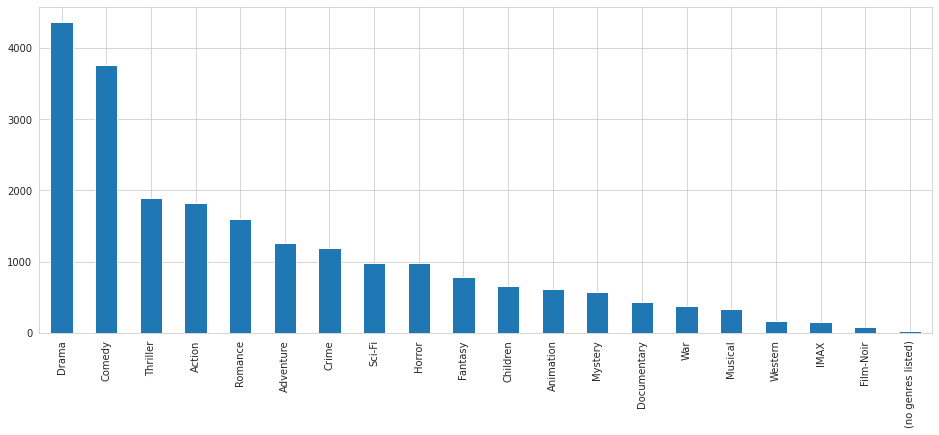

In [368]:
qtd_generos.sort_values(ascending=False).plot(kind='bar', figsize=(16,6))
plt.show()

# AULA 02

- Descobrindo boas práticas de visualização de dados e Boxplot.

In [369]:
#tratar esses 'generos' como string - .str - depois varias funçoes de string para o pandas
#get_dummies :: cria varias variaveis
filmes['genero'].str.get_dummies('|')

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [370]:
#somando as colunas
filmes['genero'].str.get_dummies('|').sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [371]:
#colocando em ordem decrescente
#é uma serie de valores - tem apenas uma coluna
#os nomes que aparecem são índices
filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

In [372]:
#puxando o index
#aparece o dataframe
filmes.index

RangeIndex(start=0, stop=9742, step=1)

In [373]:
#percebe-se que o indice de filmes vai de 0 até 9742
filmes

,filmeId,título,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [374]:
filmes.values

array([[1, 'Toy Story (1995)',
        'Adventure|Animation|Children|Comedy|Fantasy'],
       [2, 'Jumanji (1995)', 'Adventure|Children|Fantasy'],
       [3, 'Grumpier Old Men (1995)', 'Comedy|Romance'],
       ...,
       [193585, 'Flint (2017)', 'Drama'],
       [193587, 'Bungo Stray Dogs: Dead Apple (2018)',
        'Action|Animation'],
       [193609, 'Andrew Dice Clay: Dice Rules (1991)', 'Comedy']],
      dtype=object)

In [375]:
#puxando novamente (somente) o indice
filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False).index

Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure',
       'Crime', 'Sci-Fi', 'Horror', 'Fantasy', 'Children', 'Animation',
       'Mystery', 'Documentary', 'War', 'Musical', 'Western', 'IMAX',
       'Film-Noir', '(no genres listed)'],
      dtype='object')

In [376]:
filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False).values

array([4361, 3756, 1894, 1828, 1596, 1263, 1199,  980,  978,  779,  664,
        611,  573,  440,  382,  334,  167,  158,   87,   34])

In [377]:
#alterando o sort_values para 'sort_index'
filmes['genero'].str.get_dummies('|').sum().sort_index(ascending=False)

Western                167
War                    382
Thriller              1894
Sci-Fi                 980
Romance               1596
Mystery                573
Musical                334
IMAX                   158
Horror                 978
Film-Noir               87
Fantasy                779
Drama                 4361
Documentary            440
Crime                 1199
Comedy                3756
Children               664
Animation              611
Adventure             1263
Action                1828
(no genres listed)      34
dtype: int64

In [378]:
filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=True)

(no genres listed)      34
Film-Noir               87
IMAX                   158
Western                167
Musical                334
War                    382
Documentary            440
Mystery                573
Animation              611
Children               664
Fantasy                779
Horror                 978
Sci-Fi                 980
Crime                 1199
Adventure             1263
Romance               1596
Action                1828
Thriller              1894
Comedy                3756
Drama                 4361
dtype: int64

In [379]:
filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False).head()


Drama       4361
Comedy      3756
Thriller    1894
Action      1828
Romance     1596
dtype: int64

OBS: FILMES É UM DATAFRAME E QUANDO EU SOLICITO UMA COLUNA SERIA UM SeRIES - MAS SE PEDIR DUaS COLUNAS PEDE UM OUTRO DATAFRAME. UM DATAFRAME NÃO É UM SeRIeS
pandas.series.str

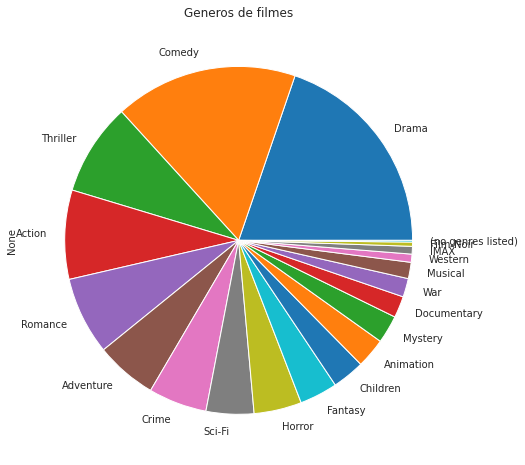

In [380]:
filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='pie', 
    title='Generos de filmes', 
    figsize=(8,8))
plt.show()
#repetição de  cores 

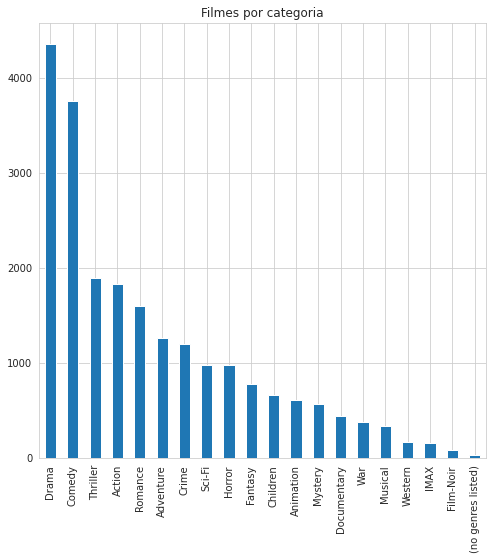

In [381]:
filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind='bar',
    title='Filmes por categoria',
    figsize=(8,8))
plt.show()

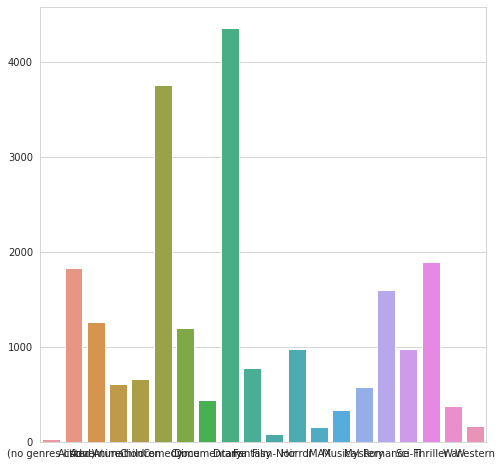

In [382]:
import seaborn as sns

filmes_por_genero = filmes['genero'].str.get_dummies('|').sum().sort_index()
plt.figure(figsize=(8,8))
sns.barplot(x=filmes_por_genero.index,
             y=filmes_por_genero.values)
plt.show()

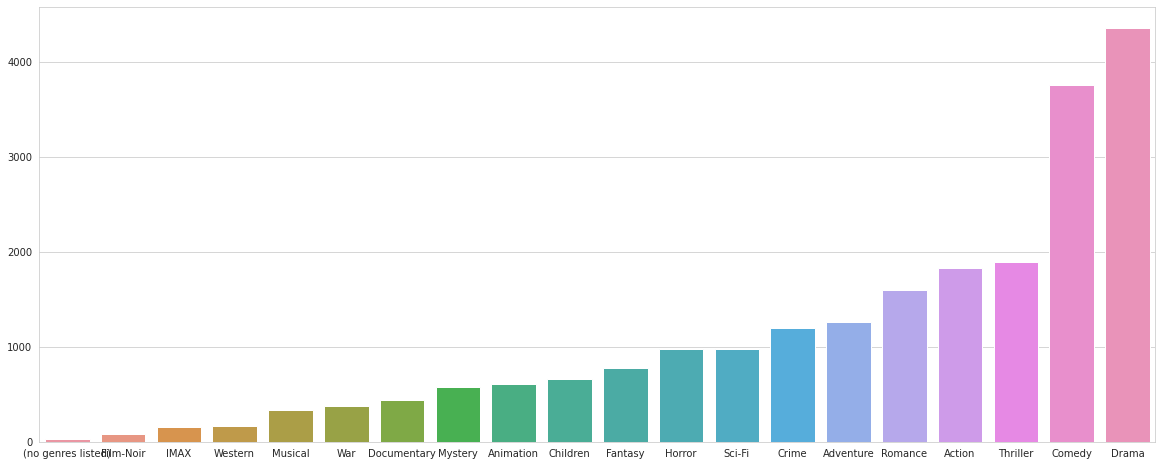

In [383]:
filmes_por_genero = filmes['genero'].str.get_dummies('|').sum().sort_values()
plt.figure(figsize=(20,8))
sns.barplot(x=filmes_por_genero.index,
             y=filmes_por_genero.values)
plt.show()

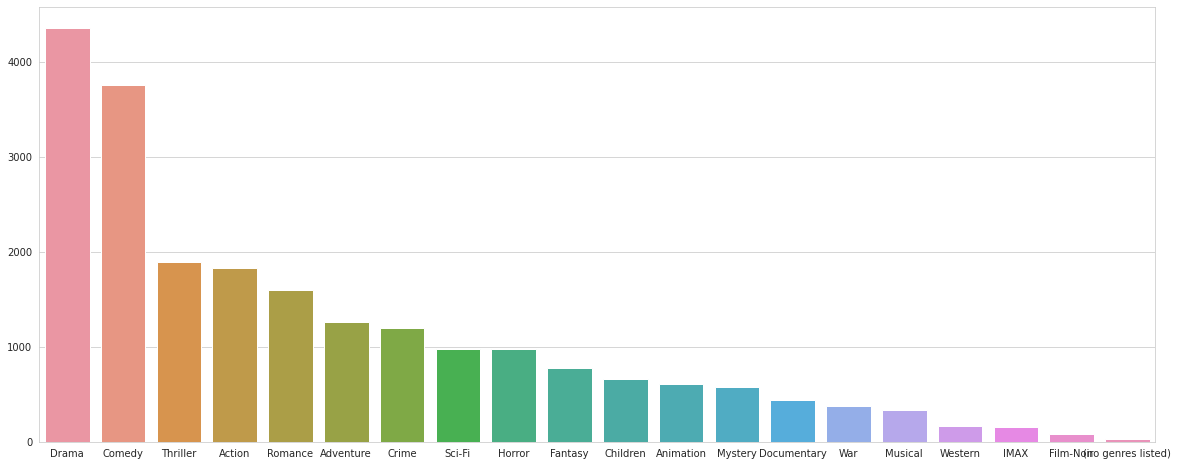

In [384]:
filmes_por_genero = filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x=filmes_por_genero.index,
             y=filmes_por_genero.values)
plt.show()

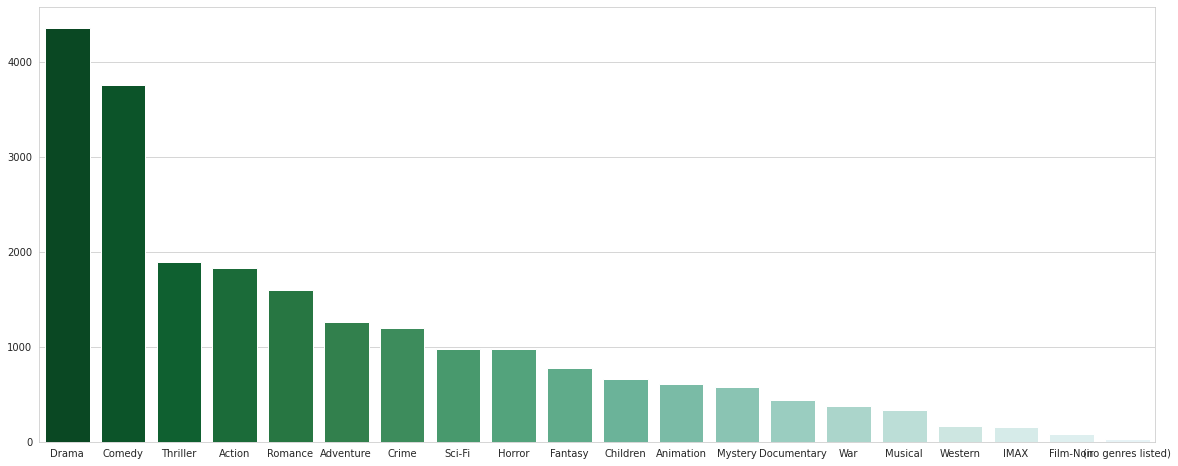

In [385]:
filmes_por_genero = filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x=filmes_por_genero.index,
             y=filmes_por_genero.values,
            palette=sns.color_palette('BuGn_r',
              n_colors=len(filmes_por_genero) + 2))
#o '+ 2 ' foi colocado para que a ultima barra não fique tão clara
plt.show()

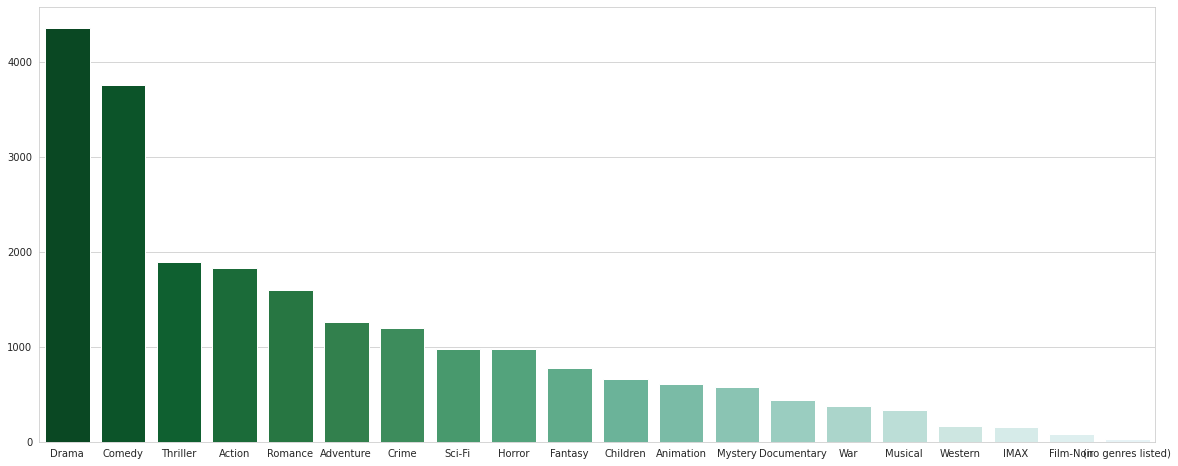

In [386]:
#aumentando o tamanho do eixo 'x'
filmes_por_genero = filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x=filmes_por_genero.index,
             y=filmes_por_genero.values,
            palette=sns.color_palette('BuGn_r',
              n_colors=len(filmes_por_genero) + 2))

plt.show()

In [0]:
import seaborn as sns
#adicionamos o sns.set_style("whitegrid") para que todos os gráficos tenham a linha de grade do 
#eixo X evidênte, facilitando a comparação entre as barras.
sns.set_style('whitegrid')

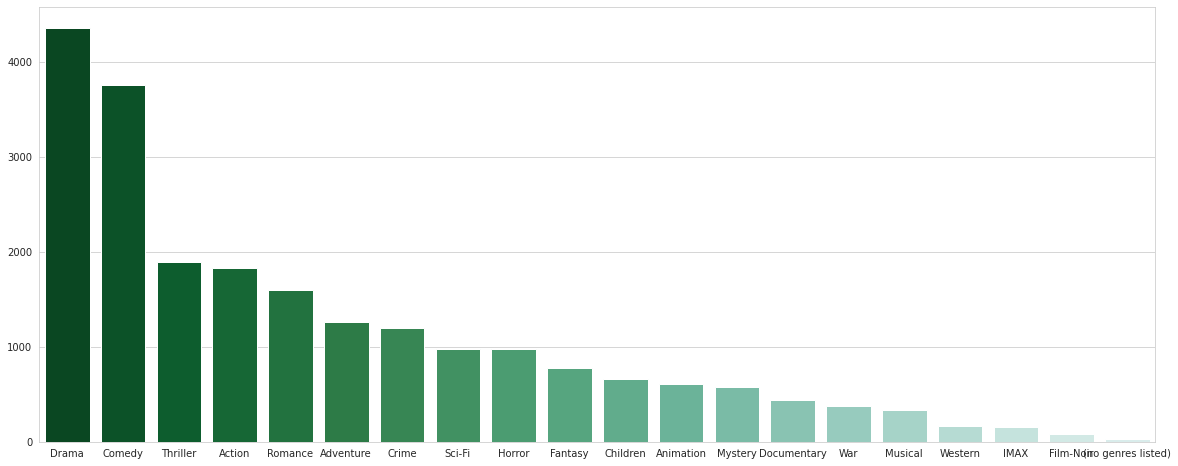

In [388]:
filmes_por_genero = filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x=filmes_por_genero.index,
             y=filmes_por_genero.values,
            palette=sns.color_palette('BuGn_r',
              n_colors=len(filmes_por_genero) + 4))
#o '+ 4 ' foi colocado para que a ultima barra não fique tão clara
plt.show()


In [389]:
filmes_com_media.head()

,filmeId,título,genero,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


*Como vimos, olhar apenas as médias pode ser um problema e para interpretar um pouco melhor os dados usamos o histograma das notas para comparar alguns filmes. Por exemplo, Toy Story e Jumanji
*

3.9209302325581397


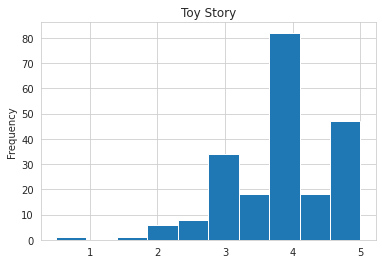

In [390]:
nota_filme_1 = avaliacoes.query('filmeId == 1')['nota']
print(nota_filme_1.mean())
nota_filme_1.plot(kind='hist', title='Toy Story')
plt.show()

3.4318181818181817


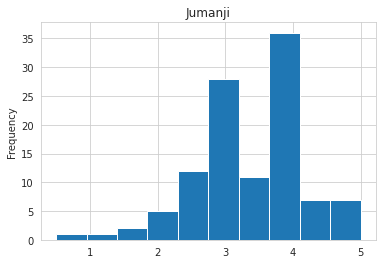

In [391]:
nota_filme_2 = avaliacoes.query('filmeId == 2')['nota']
print(nota_filme_2.mean())
nota_filme_2.plot(kind='hist', title='Jumanji')
plt.show()

ToyStory e Jumanji tem médias relativamente próximas mas com comportamento de notas diferentes, então, para nosso exemplo, as médias ajudam mas esconde informações importântes sobre os dados.

Com isso iremos buscar dois filmes com médias muito mais próximas que Toy Story e Jumanji, para analisar outras métricas além das médias.



In [392]:
nota_filme_1.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: nota, dtype: float64

In [393]:
nota_filme_2.describe()

count    110.000000
mean       3.431818
std        0.881713
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: nota, dtype: float64

Diferença entre os filmes analisados acima - entre o Toy Store e Jumanji a media no 50% tem uma diferença - no toy store em 50% esta com 4.0 enquanto jumanji está com 3.5

In [394]:
# pegando as avaliaçãoes e agrupando por filme
avaliacoes.groupby('filmeId').mean()

,usuarioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [395]:
filmes_com_media.sort_values('nota_media', ascending=False)[2450:2500]

,filmeId,título,genero,nota_media
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

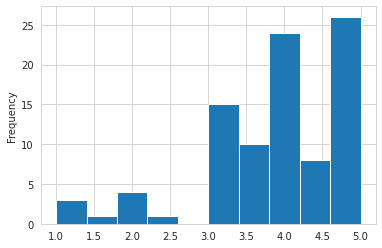

In [396]:
# pegar dois filmes acima
# definindo função
def plot_filme(n):
  notas_filmes = avaliacoes.query(f'filmeId == {n}')['nota']
  notas_filmes.plot(kind='hist')
  # imprimindo o retorno
  return notas_filmes.describe()
# 919 - corresponde ao filme Mágico de Óz
plot_filme(919)

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

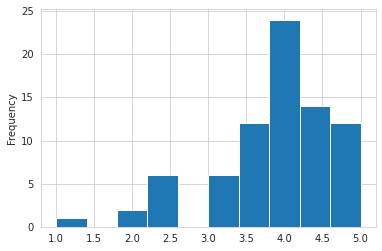

In [397]:
# 46578 - filme pequena miss sunshine
plot_filme(46578)

In [0]:
# gráfico para comparar a mediana - usando boxplot
def plot_filme(n):
  notas_filmes = avaliacoes.query(f'filmeId == {n}')['nota']
  notas_filmes.plot(kind='hist')
  notas_filmes.plot.box()
 
  return notas_filmes.describe()
  

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

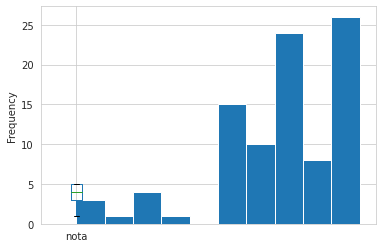

In [399]:
plot_filme(919)

In [0]:
# melhorando a analise do grafico anterior

def plot_filme(n):
  notas_filmes = avaliacoes.query(f'filmeId == {n}')['nota']
  notas_filmes.plot(kind='hist')
  plt.show()
  notas_filmes.plot.box()
  plt.show()
  return notas_filmes.describe()

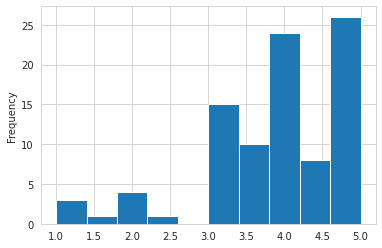

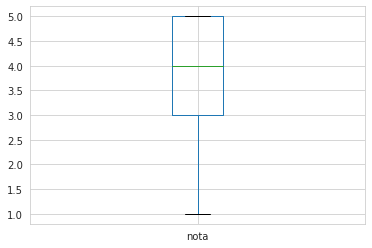

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [401]:
plot_filme(919)

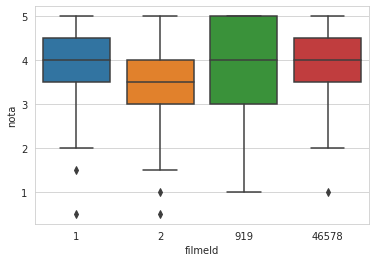

In [402]:
sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x ="filmeId", y="nota")

outlier - valor atípico - ponto muito fora da curva (por isso não vale a pena considerar - durante a análise)

### DESAFIOS - AULA 02 

- Desafio 01: Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

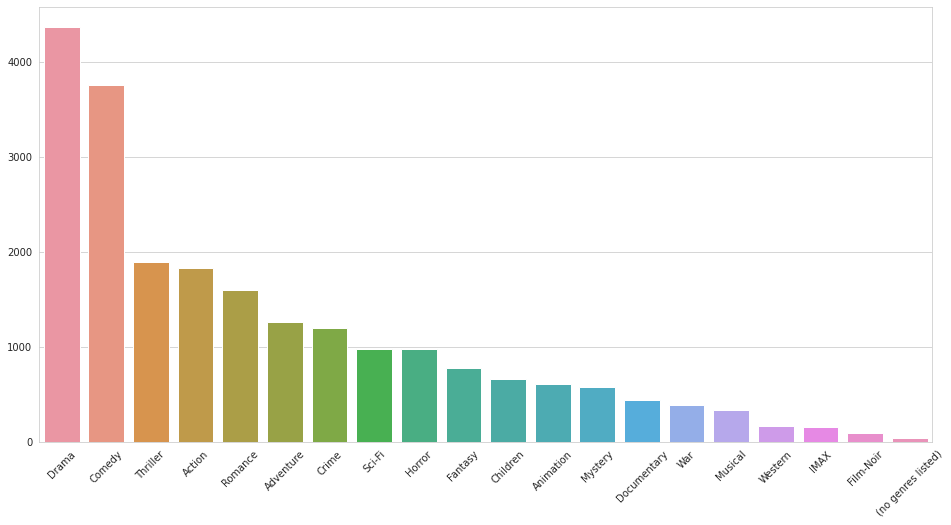

In [403]:
import seaborn as sns
sns.set_style('whitegrid')
filmes_por_genero = filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
ax = sns.barplot(x=filmes_por_genero.index,
                 y=filmes_por_genero.values)
plt.xticks(rotation=45)
plt.show()

- Desafio 02 - Encontar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.

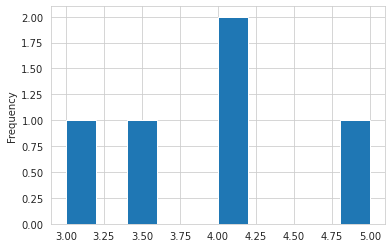

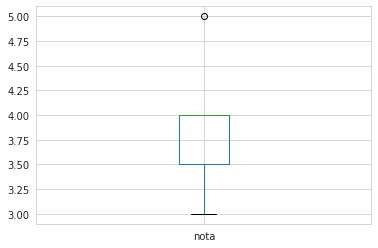

count    5.00000
mean     3.90000
std      0.74162
min      3.00000
25%      3.50000
50%      4.00000
75%      4.00000
max      5.00000
Name: nota, dtype: float64

In [404]:
# filme  Padrinhos de Tóquio - ano 2003
plot_filme(8607)

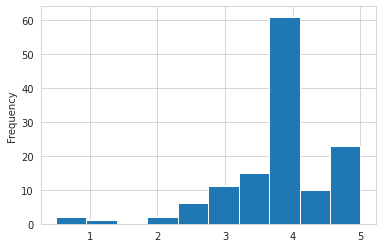

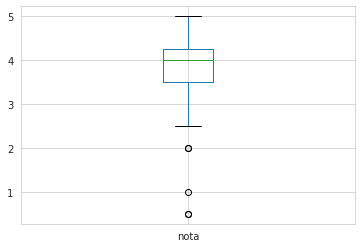

count    131.000000
mean       3.896947
std        0.849700
min        0.500000
25%        3.500000
50%        4.000000
75%        4.250000
max        5.000000
Name: nota, dtype: float64

In [405]:
# filme O Exterminador do Futuro de 1984
plot_filme(1240)

- Desafio 03: Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

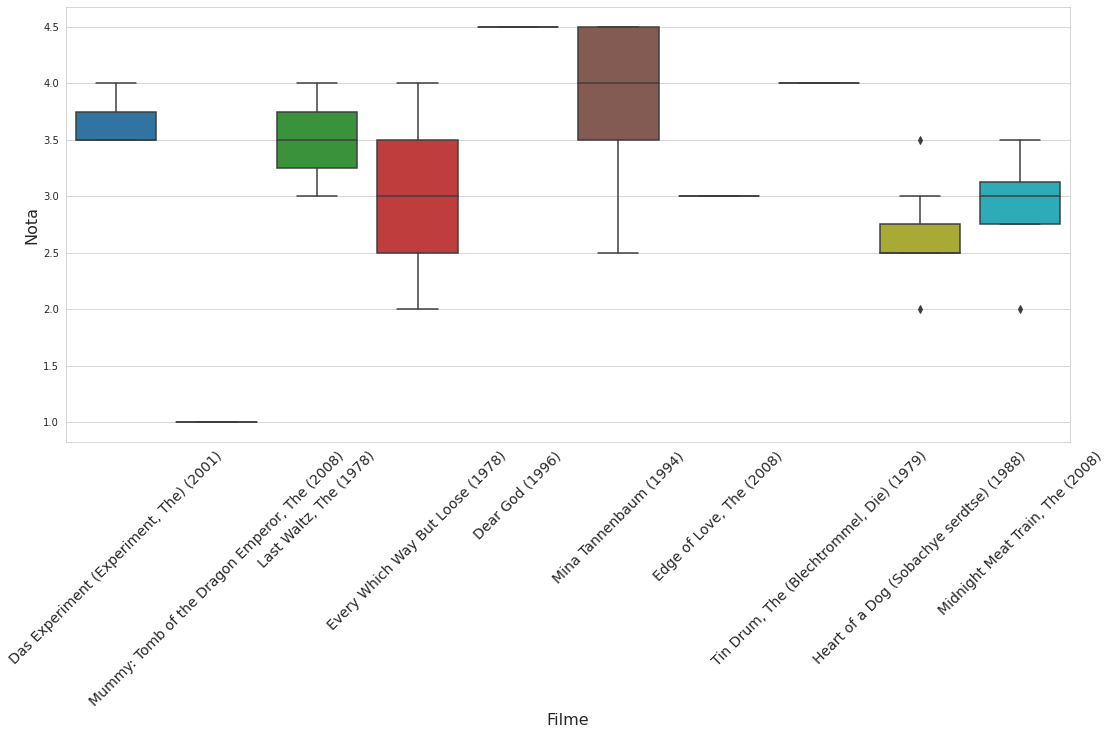

In [406]:
aval_top10 = filmes_com_media_votos.sort_values(by='total_votos', ascending=False).head(10)
aval_top10_titulos = aval_top10['título'].to_list()
aval_top10_ids = aval_top10['filmeId'].to_list()

plt.figure(figsize=(18, 8))
ax = sns.boxplot(x='filmeId', y='nota', data=avaliacoes.query(f"filmeId in {aval_top10_ids}"))
ax.set_xticklabels(aval_top10_titulos, fontsize=14)
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)
plt.xticks(rotation=45)

plt.show()

- Desafio 04: Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

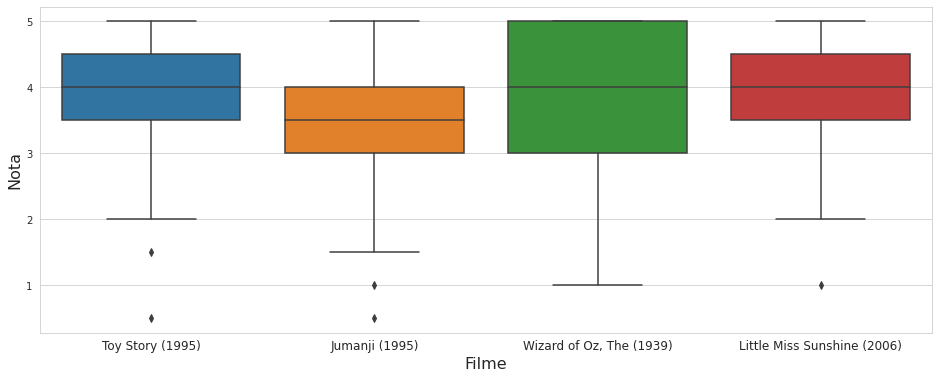

In [407]:
plt.figure(figsize=(16, 6))

ax = sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x="filmeId", y="nota")

ax.set_xticklabels(filmes.query("filmeId in [1,2,919,46578]")['título'], fontsize=12)
ax.set_xlabel("Filme", fontsize=16)
ax.set_ylabel("Nota", fontsize=16)
plt.show()

- Desafio 05: Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [0]:
def analisa_filme(filme_id):
    filme = filmes.query(f'filmeId == {filme_id}')
    nota = avaliacoes.query(f'filmeId == {filme_id}')['nota']
    
    print(f'**** Filme: {filme.iloc[0, 1]} ****\n')
    
    print(f'Moda: {nota.mode().values}')    
    print(f'Média: {nota.mean()}')
    print(f'Mediana: {nota.median()}')
    print()

In [409]:
analisa_filme(2710)
analisa_filme(172)
analisa_filme(19)

**** Filme: Blair Witch Project, The (1999) ****

Moda: [1. 4.]
Média: 2.796875
Mediana: 3.0

**** Filme: Johnny Mnemonic (1995) ****

Moda: [2.]
Média: 2.6792452830188678
Mediana: 3.0

**** Filme: Ace Ventura: When Nature Calls (1995) ****

Moda: [2.]
Média: 2.727272727272727
Mediana: 3.0



In [410]:
analisa_filme(110)
analisa_filme(1221)
analisa_filme(1387)

**** Filme: Braveheart (1995) ****

Moda: [5.]
Média: 4.031645569620253
Mediana: 4.0

**** Filme: Godfather: Part II, The (1974) ****

Moda: [5.]
Média: 4.25968992248062
Mediana: 4.5

**** Filme: Jaws (1975) ****

Moda: [5.]
Média: 4.0054945054945055
Mediana: 4.0



- Desafio 06: Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

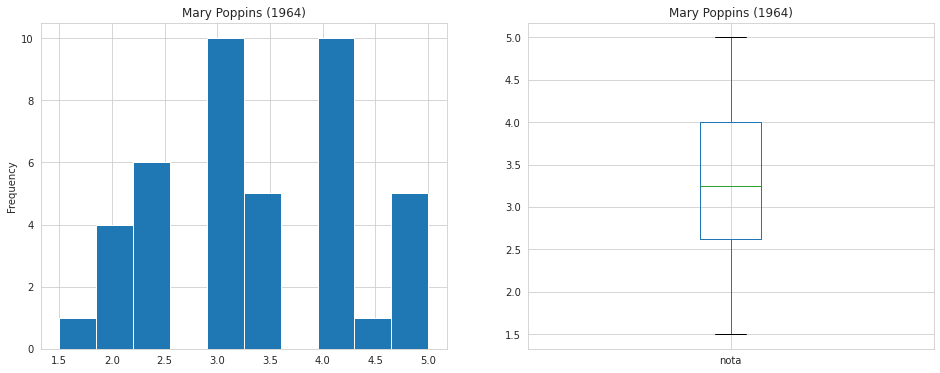

In [411]:
filme_785 = avaliacoes.query('filmeId == 785')['nota']

f, axes=plt.subplots(1, 2, figsize=(16,6))
filme_785.plot(kind='hist', ax=axes[0], title='Mary Poppins (1964)')
filme_785.plot(kind='box', ax=axes[1], title='Mary Poppins (1964)')
plt.show()

- Desafio 07: Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [412]:
filmes_media_ano = filmes_com_media.copy()
filmes_media_ano['ano'] = filmes_com_media['título'].str.extract("\((\d{4})\)")
filmes_media_ano.head()

,filmeId,título,genero,nota_media,ano
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,1995
4,5,Father of the Bride Part II (1995),Comedy,3.071429,1995


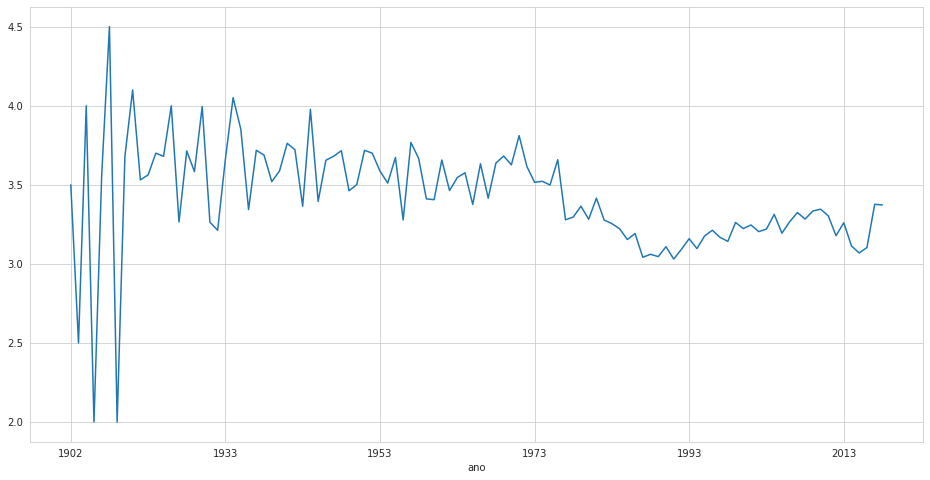

In [413]:
media_nota_ano = filmes_media_ano.groupby('ano')['nota_media'].mean()
plt.figure(figsize=(16, 8))
media_nota_ano.plot()

# AULA 03

Correlações e exploração de dados

- Nessa aula trabalhamos com analise e dados da IMBD 5000 (ela contém várias informações sobre  filmes com uma amostra de base de dados por IMD

In [414]:
imdb = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv')
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [415]:
imdb['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [416]:
#contando quantos filmes coloridos e preto e brancos
imdb['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

percebe-se que os demais foram desconsiderados

In [417]:
#possuem valore preenchidos
imdb['color'].value_counts(normalize=True)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

In [418]:
# puxando qtos filme determinado diretor tem
imdb['director_name'].value_counts()

Steven Spielberg      26
Woody Allen           22
Clint Eastwood        20
Martin Scorsese       20
Ridley Scott          17
                      ..
Terron R. Parsons      1
Michael D. Sellers     1
Ritesh Batra           1
Pou-Soi Cheang         1
Kerry Conran           1
Name: director_name, Length: 2398, dtype: int64

In [419]:
# NAN - possivelmente aguel que teve 0 - deixou vazio
imdb['num_critic_for_reviews']

0       723.0
1       302.0
2       602.0
3       813.0
4         NaN
        ...  
5038      1.0
5039     43.0
5040     13.0
5041     14.0
5042     43.0
Name: num_critic_for_reviews, Length: 5043, dtype: float64

In [420]:
imdb['num_critic_for_reviews'].describe()

count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

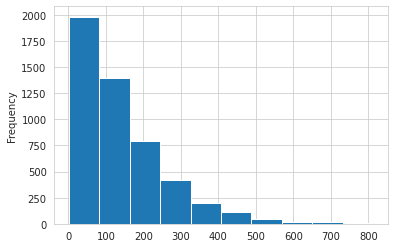

In [421]:
# histograma - qtd criticas
imdb['num_critic_for_reviews'].plot(kind='hist')
plt.show()

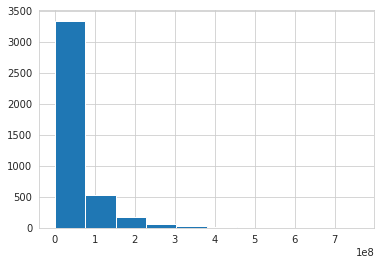

In [422]:
# verificando parte financeira dos filmes
imdb['gross'].hist()
plt.show()

Neste histograma - nota-se que os valores foram muito altos e por isso o eixo X foi apresentado com centena de milhoes.

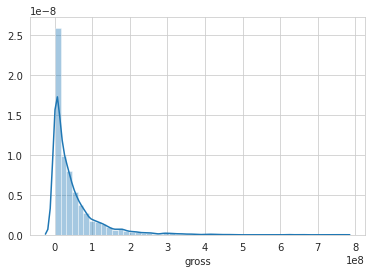

In [423]:
import seaborn as sns
sns.distplot(imdb['gross'])
plt.show()

In [424]:
# buscando pelo filem que mais faturou
imdb.sort_values('gross', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000


In [425]:
# fazendo a mesma pesquisa - buscando filme aleatorios
imdb.sort_values('gross', ascending=False).sample(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2327,Color,Angelo Pizzo,27.0,118.0,14.0,400.0,Finn Wittrock,2000.0,2246000.0,Biography|Drama|Sport,Donny Boaz,Courage,2302,3384,Brent Anderson,4.0,coach|football|football movie|football team|hi...,http://www.imdb.com/title/tt3719896/?ref_=fn_t...,20.0,English,USA,PG,2.000000e+07,2015.0,769.0,7.0,2.35,0
2792,Color,Franco Zeffirelli,62.0,117.0,160.0,55.0,Joan Plowright,718.0,14348123.0,Comedy|Drama|War,Lily Tomlin,Tea with Mussolini,9323,1148,Paolo Seganti,6.0,ambassador|american|art|english|italy,http://www.imdb.com/title/tt0120857/?ref_=fn_t...,157.0,English,Italy,PG,1.200000e+07,1999.0,330.0,6.9,1.85,970
1961,Color,John Schlesinger,86.0,99.0,154.0,347.0,Rupert Everett,774.0,14983572.0,Comedy|Drama|Romance,Mark Valley,The Next Best Thing,9361,2498,Illeana Douglas,1.0,best friend|cartoon on tv|custody battle|gay|g...,http://www.imdb.com/title/tt0156841/?ref_=fn_t...,162.0,English,USA,PG-13,2.500000e+07,2000.0,692.0,4.7,1.85,378
4410,Color,Alfred Hitchcock,97.0,95.0,13000.0,82.0,Rhonda Fleming,472.0,NaN,Film-Noir|Mystery|Romance|Thriller,Norman Lloyd,Spellbound,32927,896,Leo G. Carroll,1.0,amnesia|dream analysis|dream sequence|guilt co...,http://www.imdb.com/title/tt0038109/?ref_=fn_t...,161.0,English,USA,Unrated,1.696377e+06,1945.0,239.0,7.6,1.37,0
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
2770,Color,Patrick Lussier,264.0,101.0,71.0,725.0,Jaime King,10000.0,51527787.0,Horror|Thriller,Jensen Ackles,My Bloody Valentine,45603,14159,Edi Gathegi,0.0,coma|death|miner|valentine|valentine's day,http://www.imdb.com/title/tt1179891/?ref_=fn_t...,268.0,English,USA,R,1.500000e+07,2009.0,960.0,5.5,1.85,0
5020,NaN,Brandon Landers,NaN,143.0,8.0,8.0,Alana Kaniewski,720.0,NaN,Drama|Horror|Thriller,Robbie Barnes,The Ridges,125,770,Brandon Landers,0.0,avatar|college|death|tron|university,http://www.imdb.com/title/tt1781935/?ref_=fn_t...,8.0,English,USA,NaN,1.735000e+04,2011.0,19.0,3.0,NaN,33
2737,Color,Hsiao-Hsien Hou,205.0,105.0,141.0,56.0,Chen Chang,1000.0,613556.0,Action|Drama,Qi Shu,The Assassin,9427,1172,Satoshi Tsumabuki,1.0,black magic|china|love|refusal to kill|wuxia,http://www.imdb.com/title/tt3508840/?ref_=fn_t...,87.0,Mandarin,Taiwan,Not Rated,1.500000e+07,2015.0,103.0,6.4,1.37,0
1615,Color,Rian Johnson,589.0,119.0,0.0,502.0,Bruce Willis,23000.0,66468315.0,Action|Crime|Drama|Sci-Fi|Thriller,Joseph Gordon-Levitt,Looper,428916,37387,Tracie Thoms,0.0,chase|future|surprise ending|time loop|time tr...,http://www.imdb.com/title/tt1276104/?ref_=fn_t...,667.0,English,USA,R,3.000000e+07,2012.0,13000.0,7.4,2.35,75000
4408,Color,Yimou Zhang,101.0,95.0,611.0,3.0,Ni Yan,9.0,190666.0,Comedy|Drama,Honglei Sun,"A Woman, a Gun and a Noodle Shop",2410,18,Dahong Ni,1.0,betrayal|husband wife relationship|murder|nood...,http://www.imdb.com/title/tt1428556/?ref_=fn_t...,20.0,Mandarin,China,R,NaN,2009.0,4.0,5.7,2.35,784


In [426]:
#tamanho - qtd toal filmes coloridos e pb
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
len(color_or_bw)

5024

obs : coloca-se 0 e 1 para se ter um conceito de maior e menor.
futuramente precisará trsnformá-lo em binario 0 1

In [427]:
# colorido e preto-branco: 0 1
# remover colunas não preenchidas
# multiplicando por 1 - se for 1 verdadeiro // se for 0 falso
color_or_bw['color_0_1'] = (color_or_bw['color'] =='Color') * 1
color_or_bw.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


In [428]:
# qtd d filmes coloridos e preto e brancos
color_or_bw['color_0_1'].value_counts()

1    4815
0     209
Name: color_0_1, dtype: int64

Respondendo perguntas...

- Será que filmes coloridos tem faturamento maior que filmes preto e branco?


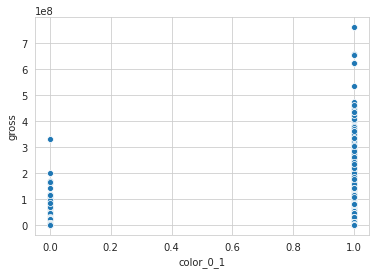

In [429]:
sns.scatterplot(data=color_or_bw, x="color_0_1", 
                                  y="gross")
plt.show()

In [430]:
# agrupar pela cor e fazer a media
color_or_bw.groupby('color').mean()['gross']

color
 Black and White    3.245702e+07
Color               4.902619e+07
Name: gross, dtype: float64

In [431]:
color_or_bw.groupby('color').mean()['imdb_score']

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

In [432]:
# selecionando duas colunas
imdb[['budget', 'gross']]

,budget,gross
0,237000000.0,760505847.0
1,300000000.0,309404152.0
2,245000000.0,200074175.0
3,250000000.0,448130642.0
4,NaN,NaN
...,...,...
5038,NaN,NaN
5039,NaN,NaN
5040,1400.0,NaN
5041,NaN,10443.0


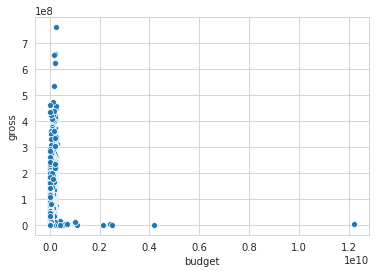

In [433]:
# plotando as colunas e apagando os NAN
budget_gross=  imdb[["budget", "gross"]].dropna().query("budget >0 | gross > 0")

sns.scatterplot(x="budget", y="gross", data = budget_gross)
plt.show()

Para plotar os dados, primeiro removemos as linhas com informações de faturamento e orçamento vazias e também com valores igual a 0, para então gerar o gráfico.

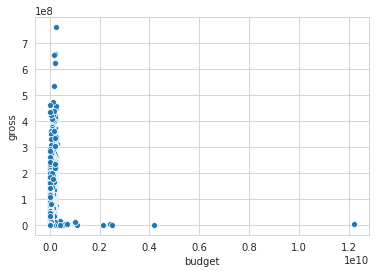

In [434]:
budget_gross = imdb[["budget", "gross"]].dropna().query("budget > 0 | gross > 0")

sns.scatterplot(x="budget", y="gross", data = budget_gross)
plt.show()

In [435]:
imdb.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,907,Hye-jeong Kang,0.0,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,11,Bálint Péntek,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,991,Rosalind Ayres,1.0,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973


OBS:. Ordenando os dados pelo budget percebemos que as primeiras posições são de filmes asiáticos. O Guilherme trouxe um ponto interessante para a investigação, pois países como a Coreia usam moedas que tem três casas decimais a mais que o dólar. Então provavelmente o que está ocorrendo é que os dados de orçamento tem valores na moeda local, por isso detectamos valores tão discrepantes.

In [436]:
#focando em analise de filmes americanos, por conta da moeda
imdb["country"].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

In [437]:
imdb_usa = imdb.query("country == 'USA'")
imdb_usa.sort_values('budget', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


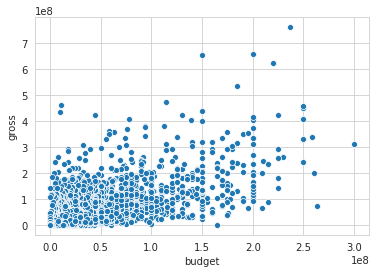

In [438]:
budget_gross = imdb_usa[["budget", "gross"]].dropna().query("budget >0 | gross > 0")

sns.scatterplot(x="budget", y="gross", data = budget_gross)
plt.show()

Fazendo calculo de prejuizo e lucro


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


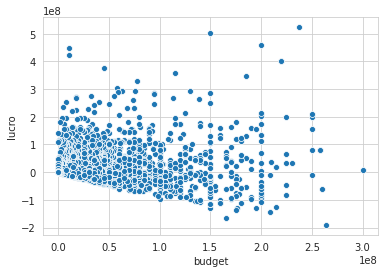

In [439]:
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']
budget_gross = imdb_usa.query("budget > 0 | gross > 0")[["budget", "lucro"]].dropna()
sns.scatterplot(x="budget", y="lucro", data = budget_gross)
plt.show()

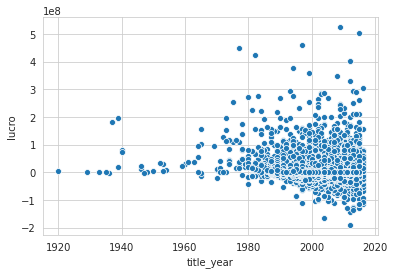

In [440]:
# puxando grafico por ano
budget_gross = imdb_usa.query("budget >0 | gross > 0")[["title_year", "lucro"]].dropna()

sns.scatterplot(x="title_year", y="lucro", data = budget_gross)

In [441]:
filmes_por_diretor = imdb_usa['director_name'].value_counts()
filmes_por_diretor.head()

Steven Spielberg    24
Clint Eastwood      20
Martin Scorsese     20
Woody Allen         18
Spike Lee           16
Name: director_name, dtype: int64

In [442]:
imdb_usa[['director_name', 'gross']].set_index('director_name').join(filmes_por_diretor, on='director_name')

,gross,director_name
director_name,,
James Cameron,760505847.0,6.0
Gore Verbinski,309404152.0,7.0
Christopher Nolan,448130642.0,8.0
Andrew Stanton,73058679.0,3.0
Sam Raimi,336530303.0,11.0
...,...,...
Edward Burns,4584.0,4.0
NaN,NaN,NaN
Benjamin Roberds,NaN,1.0


In [443]:
# analisando nomes de diretores e seus orçamenos
filmes_por_diretor = imdb_usa["director_name"].value_counts()
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["dindin", "filmes_irmaos"]
gross_director = gross_director.reset_index()
gross_director.head()

,director_name,dindin,filmes_irmaos
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


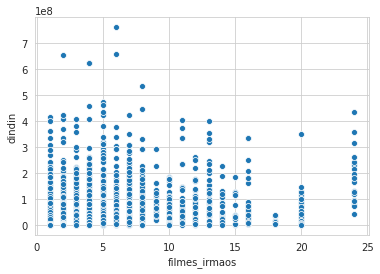

In [444]:
sns.scatterplot(x="filmes_irmaos", y="dindin", data = gross_director)

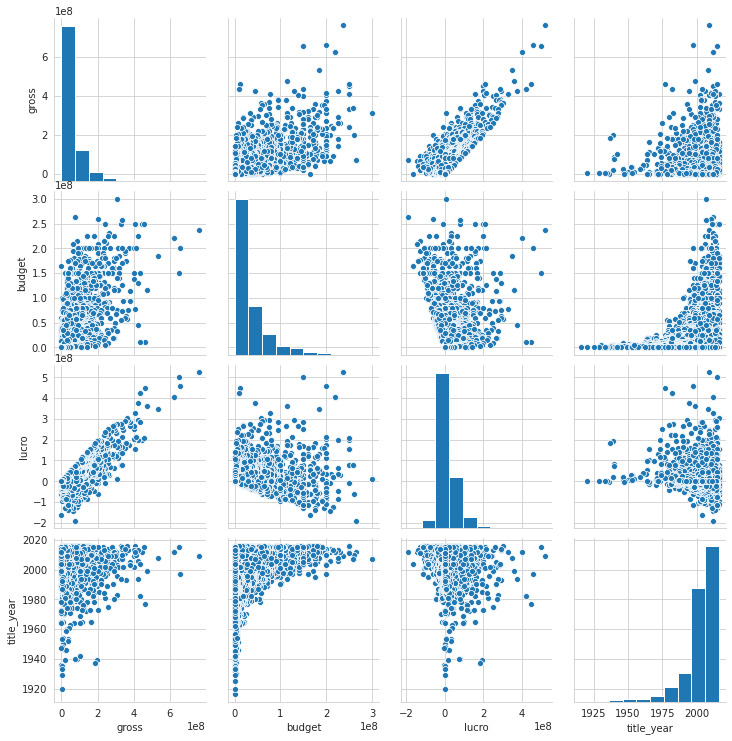

In [445]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])
plt.show()

análise das correlações dos dados -  plotando o pairplot.

In [446]:
imdb_usa[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.646158,0.799260,0.036865
budget,0.646158,1.000000,0.057774,0.232640
lucro,0.799260,0.057774,1.000000,-0.122092
title_year,0.036865,0.232640,-0.122092,1.000000


A correlação é uma métrica que vai de 1 a -1.
- correlação é 1: totalmente correlacionada (relação linear perfeita e positiva) - ou seja se uma variável aumenta em 10 a outra também irá aumentar em 10.
- correlação é -1:  variáveis tbm totalmente correlaciondas - mas de maneira negativa (relação linear perfeita negativa) - uma variável aumenta em 10 a outra reduz em 10.
- correlação é 0: inexistência de correlação - uma variável não tem influêcia sobre a outra.

neste caso -  lucro e gross - tem uma correlação alta (quanto maior o orçamento maior o lucro). 

title_years e lucro - correlação negativa (muito perto de zero - quase não tem correlação)


### DESAFIOS - AULA 03


- Desafio 01: Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

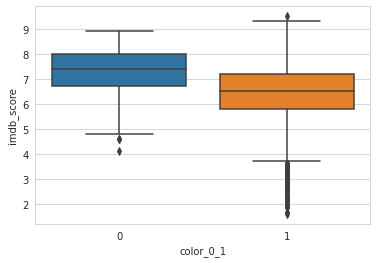

In [447]:
sns.boxplot(data=color_or_bw,
            x='color_0_1', 
            y='imdb_score')
plt.show()

- Desafio 02: No gráfico de budget por lucro temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).

In [448]:
imdb_usa.sort_values('lucro').head(1)['movie_title']


5    John Carter 
Name: movie_title, dtype: object

- Desafio 03: Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

In [449]:
imdb_usa.query('budget > 0 and gross > 0').sort_values('title_year', ascending=False).head(15)[['movie_title', 'lucro', 'title_year']]

,movie_title,lucro,title_year
812,Deadpool,305024263.0,2016.0
380,Now You See Me 2,-25314641.0,2016.0
2840,Miracles from Heaven,48693523.0,2016.0
1825,Money Monster,14008532.0,2016.0
73,Suicide Squad,-13912817.0,2016.0
3756,The Perfect Match,4658370.0,2016.0
2286,Triple 9,-7373095.0,2016.0
2848,The Shallows,37257433.0,2016.0
2562,Bad Moms,35461307.0,2016.0
2549,The Young Messiah,-12037424.0,2016.0


- Desafio 04: Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

In [450]:
filme_pre_guerra = imdb_usa.query('title_year < 1945').sort_values('lucro', ascending=False).dropna()
filme_pre_guerra[['movie_title', 'lucro']].head()

,movie_title,lucro
3970,Gone with the Wind,194678278.0
4449,Snow White and the Seven Dwarfs,182925485.0
1143,Pinocchio,81700000.0
4157,The Wizard of Oz,19402612.0
4812,The Broadway Melody,2429000.0


- Desafio 05: No gráfico de filmes_irmaos por dindin temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode corneta nas redes sociais kkkkk)

In [451]:
gross_director[(gross_director['filmes_irmaos'] > 16) & (gross_director['filmes_irmaos'] < 20)]

,director_name,dindin,filmes_irmaos
1549,Woody Allen,7496522.0,18.0
1748,Woody Allen,16684352.0,18.0
1873,Woody Allen,13383737.0,18.0
1881,Woody Allen,10569071.0,18.0
1884,Woody Allen,9714482.0,18.0
1973,Woody Allen,33404871.0,18.0
1988,Woody Allen,17071230.0,18.0
2006,Woody Allen,3203044.0,18.0
2085,Woody Allen,14792779.0,18.0
2094,Woody Allen,4839383.0,18.0


- Desafio 06: Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

In [452]:
filmes_depois_de_2000 = imdb_usa.query('title_year >= 2000')
filmes_depois_de_2000[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.708050,0.774906,0.108058
budget,0.708050,1.000000,0.102324,0.065052
lucro,0.774906,0.102324,1.000000,0.034094
title_year,0.108058,0.065052,0.034094,1.000000


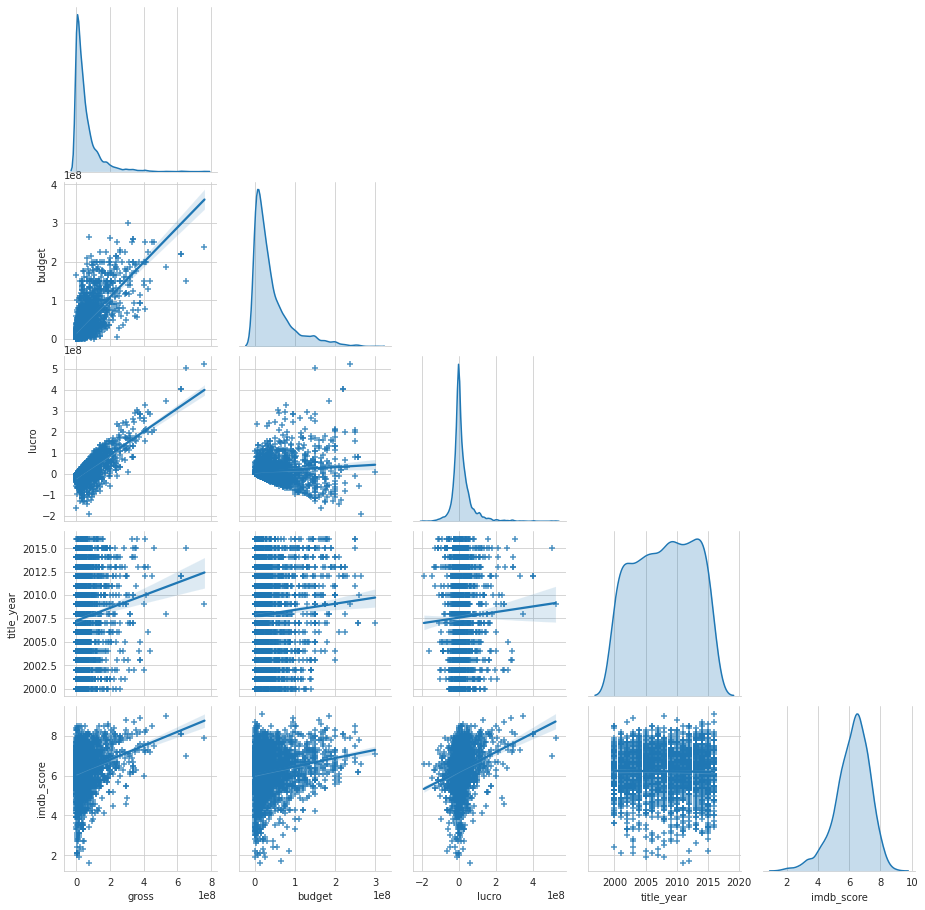

In [453]:
sns.pairplot(data=filmes_depois_de_2000[["gross", "budget" ,  "lucro" ,  "title_year", "imdb_score"]], kind="reg", corner=True, diag_kind="kde", markers="+", dropna=True)
plt.show()

- Desafio 07: Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

In [454]:
filme_antes_2000 = imdb_usa.query("title_year <  2000")
filme_antes_2000[["gross", "budget" ,  "lucro" ,  "title_year", "imdb_score"]].corr()

,gross,budget,lucro,title_year,imdb_score
gross,1.000000,0.405612,0.909406,-0.051854,0.306563
budget,0.405612,1.000000,-0.011294,0.399758,-0.127907
lucro,0.909406,-0.011294,1.000000,-0.191317,0.377709
title_year,-0.051854,0.399758,-0.191317,1.000000,-0.293088
imdb_score,0.306563,-0.127907,0.377709,-0.293088,1.000000


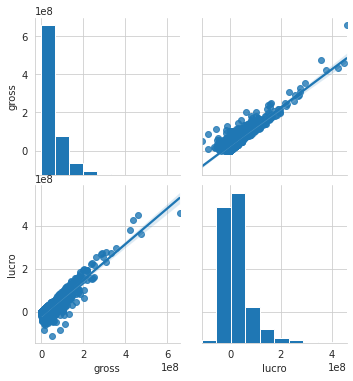

In [455]:
sns.pairplot(data=filme_antes_2000[["gross", "lucro" ]], kind="reg")
plt.show()

- Desafio 08: Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.

In [456]:
imdb_usa[["gross", "budget", "imdb_score"]].corr()

,gross,budget,imdb_score
gross,1.000000,0.646158,0.258876
budget,0.646158,1.000000,0.077970
imdb_score,0.258876,0.077970,1.000000


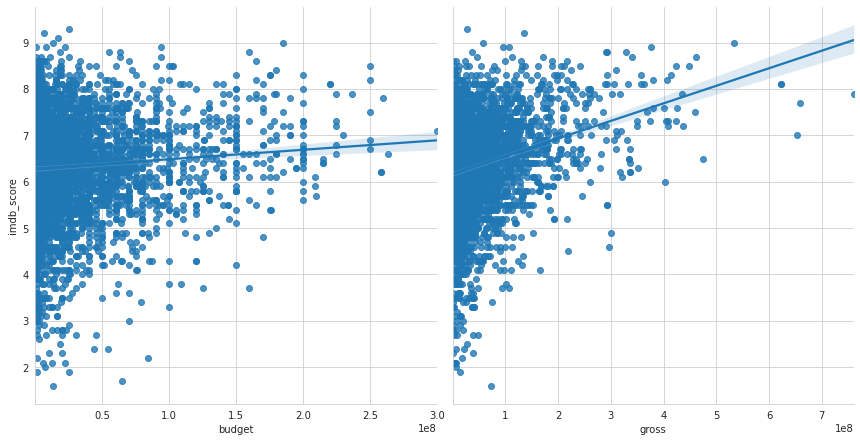

In [457]:
sns.pairplot(imdb_usa, y_vars='imdb_score', x_vars=['budget', 'gross'], height=6, kind='reg')
plt.show()

In [458]:
votos_ano = imdb_usa.groupby('title_year')['num_voted_users'].mean()
imdb_usa_votos_ano = imdb_usa.join(votos_ano, on='title_year', rsuffix='rs')
imdb_usa_votos_ano.rename(columns={'num_voted_usersrs': 'votos_ano'}, inplace=True)
imdb_usa_votos_ano.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro,votos_ano
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,90165.260870
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,105789.953642
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,121908.976879
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,121908.976879
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0,105789.953642


In [459]:
imdb_usa_votos_ano[['title_year', 'votos_ano']].corr()

,title_year,votos_ano
title_year,1.000000,0.144777
votos_ano,0.144777,1.000000


In [460]:
imdb_usa_votos_ano = imdb_usa.groupby("title_year").sum()["num_voted_users"]
imdb_usa_votos_ano.head()

title_year
1916.0    10718
1920.0        5
1925.0     4849
1929.0     4546
1930.0     3753
Name: num_voted_users, dtype: int64